## Importing Libraries

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

#  Imbalanced Learn for imbalanced class
import imblearn

# Scikit-learn for ML prediction and modelling

import sklearn
from sklearn.metrics import mean_squared_error, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from os import path
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 101)


## Data Wrangling & Visualization


In [2]:
data = pd.read_csv("brain_stroke.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Checking Column Values

In [4]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Exploring Data Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## Statistical Overview of the given data set (quantiles, count, mean, std)

In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


In [8]:
data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

##  Deciding about the Unknown in smoking_status

In [9]:
# Since never smoked people are more than formerly smoked or smokes people, changing Unknown to never smoked.

data['smoking_status'] = data['smoking_status'].replace(['Unknown'],'never smoked')

## Estimating the total number of missing values


In [10]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
data.shape


(4981, 11)

In [12]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          3
stroke                  2
dtype: int64

## Outlier Removal of values beyond 2 std from the mean

In [13]:
features = ['age','avg_glucose_level','bmi']

for entry in features:
    data[entry]=data[entry][(data[entry] > (data[entry].mean()-2*data[entry].std())) & (data[entry] <=(data[entry].mean()+ 2*data[entry].std()))]
    
    
    
    

In [14]:
data.isna().sum()
data.dropna(inplace=True)

In [15]:
data.shape

(4349, 11)

In [16]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


## Encoding the categorical variables

In [17]:
features = ['gender','ever_married','work_type','Residence_type','smoking_status']

for entry in features:
    data[entry]=data[entry].astype('category').cat.codes



In [18]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,0,49.0,0,0,1,1,1,171.23,34.4,2,1
3,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,1,81.0,0,0,1,1,1,186.21,29.0,0,1
5,1,74.0,1,1,1,1,0,70.09,27.4,1,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


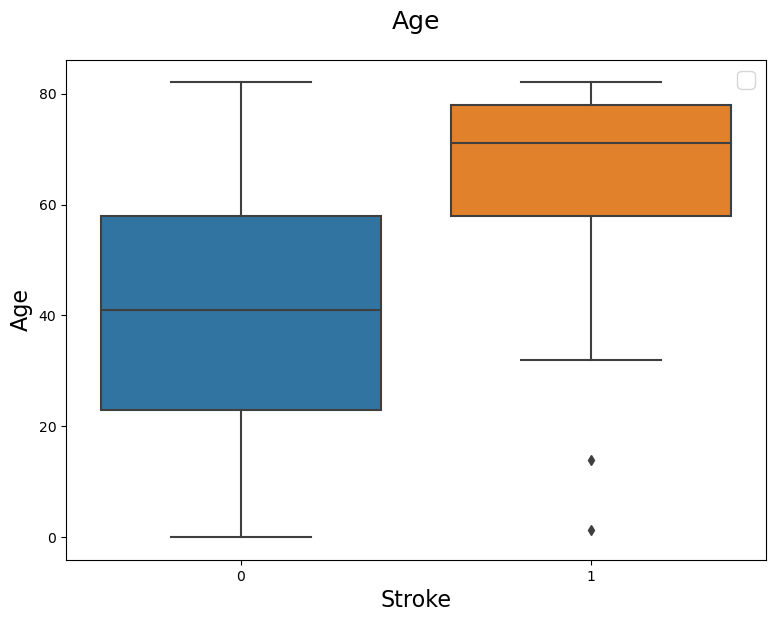

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Age", y=1.1, fontsize=18)

sns.boxplot(y='age', x='stroke', data=data)
axes.set_xlabel("Stroke", fontsize=16)
axes.set_ylabel("Age", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


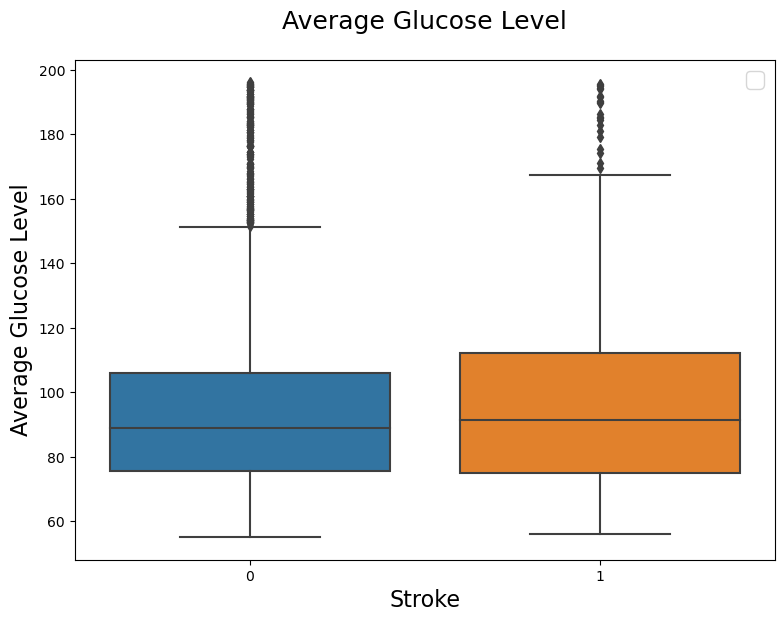

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("Average Glucose Level", y=1.1, fontsize=18)

sns.boxplot(y='avg_glucose_level', x='stroke', data=data)
axes.set_xlabel("Stroke", fontsize=16)
axes.set_ylabel("Average Glucose Level", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


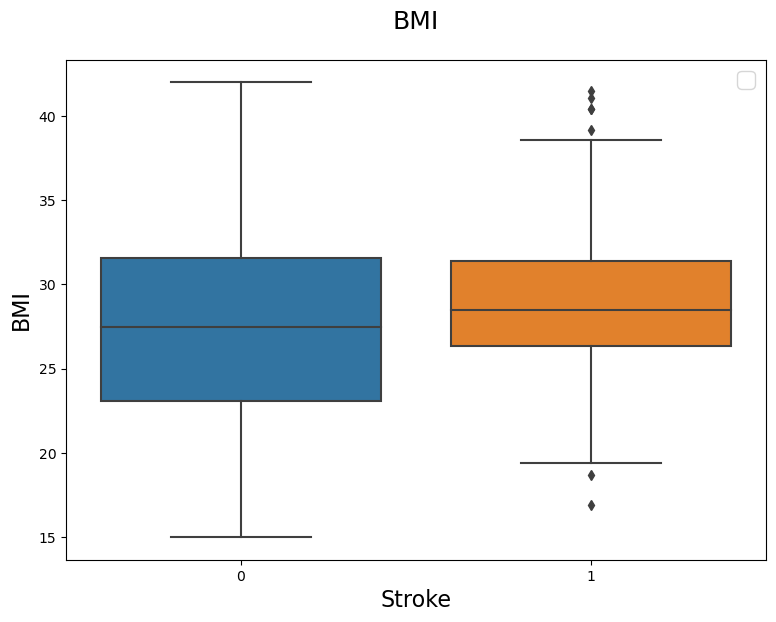

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(7,5), dpi=100)
fig.suptitle("BMI", y=1.1, fontsize=18)

sns.boxplot(y='bmi', x='stroke', data=data)
axes.set_xlabel("Stroke", fontsize=16)
axes.set_ylabel("BMI", fontsize=16)
axes.legend(fontsize=16)

fig.subplots_adjust(left=0., bottom=0., right=1., top=1.0)
# plt.savefig('Fig2_median_overspend_bar.png', dpi=300, bbox_inches = 'tight')
plt.show()

## Checking the class balance

Brain Stroke Happened: 4.184870085077029
Brain Stroke Not Happened : 95.81512991492296


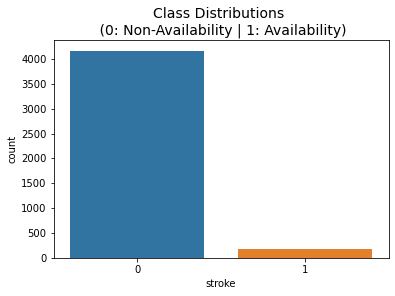

In [22]:
# Class balance
import matplotlib.pyplot as plt
model_df=data
print('Brain Stroke Happened:',len(model_df[model_df['stroke']==1])/len(model_df)*100)
print('Brain Stroke Not Happened :',len(model_df[model_df['stroke']==0])/len(model_df)*100)
# sns.set_theme(style="darkgrid")
g=sns.countplot(data=model_df, x='stroke')
plt.title('Class Distributions \n (0: Non-Availability | 1: Availability)',fontsize=14)
plt.show()
# Class imbalance needs to be taken care before applying model

## Oversampling the Imbalanced Data with Synthetic Minority Oversampling Technique (SMOTE)

Brain Stroke Happened: 50.0
Brain Stroke Not Happened : 50.0


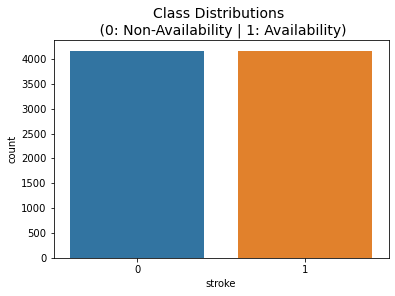

In [23]:
#Oversampling the data

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']], data['stroke'])


#Creating a new Oversampling Data Frame
data_oversampler = pd.DataFrame(X, columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status'])
data_oversampler['stroke']=y


# data_oversampler.head()



#Checking class balance again!


import matplotlib.pyplot as plt
model_df=data_oversampler
print('Brain Stroke Happened:',len(model_df[model_df['stroke']==1])/len(model_df)*100)
print('Brain Stroke Not Happened :',len(model_df[model_df['stroke']==0])/len(model_df)*100)
# sns.set_theme(style="darkgrid")
g=sns.countplot(data=model_df, x='stroke')
plt.title('Class Distributions \n (0: Non-Availability | 1: Availability)',fontsize=14)
plt.show()



## Splitting the training data to train and validation sets 


In [24]:
X = model_df.drop(columns = ['stroke']) 
y = model_df['stroke']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=42)
print('X shape -', X_train.shape)
print('y shape -', y_train.shape)

X shape - (6667, 10)
y shape - (6667,)


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_log = clf_log.predict(X_valid)

print("Accuracy (in %):", clf_log.score(X_valid, y_valid)*100)
print('F1 score', f1_score(y_valid, y_pred_log))

Accuracy (in %): 83.0233953209358
F1 score 0.8336272780717225


## Random Forest Classifier

In [26]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print("Accuracy (in %):", clf.score(X_valid, y_valid)*100)
# y_pred = clf.predict(X_valid)
y_pred = (clf.predict_proba(X_valid)[:,1] >= 0.5).astype(bool)
print('F1 score', f1_score(y_valid, y_pred))

Accuracy (in %): 94.90101979604079
F1 score 0.9469339622641509


Note: you may need to restart the kernel to use updated packages.


## XGBoost Model

In [28]:
# fit model no training data

from xgboost import XGBClassifier


model = XGBClassifier()
model.fit(X_train, y_train)



# make predictions for test data
y_pred = model.predict(X_valid)


print("Accuracy (in %):", model.score(X_valid, y_valid)*100)
print('F1 score', f1_score(y_valid, y_pred))

Accuracy (in %): 95.68086382723455
F1 score 0.9572446555819478


## Feature Importance


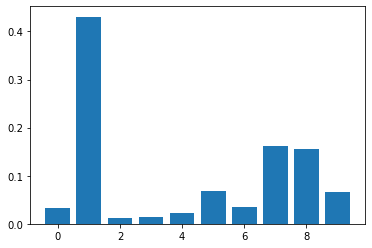

In [29]:
importance=clf.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Age, Average Glucose Level and BMI have more impact on Brain Stroke. 